# **5. Bayes Rules**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

In [2]:
import sys
sys.path.insert(0, "/home/ubuntu/learning/probability-and-random-variables/")

from probs_module.module_proba_5 import hitung_probabilitas
from probs_module.module_proba_5 import hitung_total_probabilitas
from probs_module.module_proba_5 import hitung_probabilitas_posterior
from probs_module.module_proba_5 import plot_range_probabilitas_posterior
from probs_module.module_proba_5 import hitung_jumlah_kejadian
from probs_module.module_proba_5 import plot_interaktif_probabilitas_posterior
from probs_module.module_proba_5 import summary_data

Install Library Tabulate

In [ ]:
# !pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
## **Case Barang Rusak - Law of Total Probability**

- Suatu pabrik menggunakan 4 mesin untuk memproduksi barang sejenis.
- Produksi harian dari mesin pertama, kedua, ketiga dan keempat masing-masing sebesar 1.000, 1.200, 1.800, dan 2.000 buah.
- Produksi dari mesin pertama, kedua, ketiga dan keempat masing-masing mengalami kerusakan sebanyak 1%, 0.5%, 0.5%, dan 1%. Lalu

Berapa total probabilitas dari barang yang rusak?

Misal:

    - i = 1,2,3,4
    - Mesin_i = produksi barang dari mesin ke i
    - rusak = produksi barang yang rusak

Kita tinjau kembali persamaan total probabilitas, dimana:

$$
\begin{align*}
P(A) &= P(B_{1})P(A \ | \ B_{1}) + P(B_{2})P(A \ | \ B_{2}) + \cdots + P(B_{n})P(A \ | \ B_{n}) \\
     &= \sum_{i}^{n} P(B_{i})P(A \ | \ B_{i})
\end{align*}
$$

Maka yang dicari adalah:

$$
P(\text{rusak}) = P(\text{mesin}_{1}) \cdot P(\text{rusak} \ | \ \text{mesin}_{1})  + P(\text{mesin}_{2}) \cdot P(\text{rusak} \ | \ \text{mesin}_{2})
\\ + P(\text{mesin}_{3}) \cdot P(\text{rusak} \ | \ \text{mesin}_{3})
 + P(\text{mesin}_{4}) \cdot P(\text{rusak} \ | \ \text{mesin}_{4})
\\
$$

$$
\\
P(\text{rusak}) = \sum_{i} P(\text{mesin}_{i}) P(\text{rusak} \ | \ \text{mesin}_{i})
$$

Dalam kasus ini kita belum memiliki nilai probabilitas dari tiap mesin, sehingga kita akan mencari nilai probabilitas dari masing-masing mesin, $P(\text{mesin}_{i})$, terlebih dahulu:

In [3]:
# mendapatkan ruang sample
produksi_Mesin1 = 1000
produksi_Mesin2 = 1200
produksi_Mesin3 = 1800
produksi_Mesin4 = 2000

total_produksi = produksi_Mesin1 + produksi_Mesin2 + produksi_Mesin3 + produksi_Mesin4

# Probabilitas barang dari masing-masing mesin
P_Mesin1 = hitung_probabilitas(total_produksi, produksi_Mesin1)
print(f"probabilitas produksi barang dari mesin pertama adalah {P_Mesin1:.2f}")

P_Mesin2 = hitung_probabilitas(total_produksi, produksi_Mesin2)
print(f"probabilitas produksi barang dari mesin kedua adalah {P_Mesin2:.2f}")

P_Mesin3 = hitung_probabilitas(total_produksi, produksi_Mesin3)
print(f"probabilitas produksi barang dari mesin ketiga adalah {P_Mesin3:.2f}")

P_Mesin4 = hitung_probabilitas(total_produksi, produksi_Mesin4)
print(f"probabilitas produksi barang dari mesin keempat adalah {P_Mesin4:.2f}")

probabilitas produksi barang dari mesin pertama adalah 0.17
probabilitas produksi barang dari mesin kedua adalah 0.20
probabilitas produksi barang dari mesin ketiga adalah 0.30
probabilitas produksi barang dari mesin keempat adalah 0.33


Selanjutnya kita mendefinisikan probabilitas barang yang rusak dari tiap mesin, $P(\text{rusak} \ | \ \text{mesin}_{i})$

In [4]:
# Langkah 2 mendefinisikan nilai probabilitas barang rusak dari masing-masing mesin
P_Rusak_Mesin1 = 0.01
P_Rusak_Mesin2 = 0.005
P_Rusak_Mesin3 = 0.005
P_Rusak_Mesin4 = 0.01

Untuk menghitung total probabilitas barang rusak dapat digunakan:

$$
P(\text{rusak}) = P(\text{mesin}_{1}) \cdot P(\text{rusak} \ | \ \text{mesin}_{1})  + P(\text{mesin}_{2}) \cdot P(\text{rusak} \ | \ \text{mesin}_{2})
\\ + P(\text{mesin}_{3}) \cdot P(\text{rusak} \ | \ \text{mesin}_{3})
 + P(\text{mesin}_{4}) \cdot P(\text{rusak} \ | \ \text{mesin}_{4})
$$

Sehingga nilai total probabilitasnya:

In [5]:
# P_Rusak = probabilitas total barang rusak
P_Rusak = P_Mesin1*P_Rusak_Mesin1 + P_Mesin2*P_Rusak_Mesin2 \
          + P_Mesin3*P_Rusak_Mesin3 + P_Mesin4*P_Rusak_Mesin4

print(f"Total probabilitas dari barang yang rusak adalah {P_Rusak:.4f}")

Total probabilitas dari barang yang rusak adalah 0.0075


---
## **Case Email Spam - Bayes' Rule**

Saat ini Bobi sedang mengembangkan aplikasi pendeteksi email spam dan dia sedang mengujinya ke akun emailnya sendiri. Bobi mengasumsikan bahwa 3% dari 5000 email yang masuk ke akunnya adalah spam.

<center>
<img src="https://miro.medium.com/v2/resize:fit:920/1*CS-OYdiRLCBMBiOpEURy0g.png">
</center>

[sumber gambar](https://miro.medium.com/v2/resize:fit:920/1*CS-OYdiRLCBMBiOpEURy0g.png)

Setelah melakukan beberapa percobaan Bobi menyimpulkan bahwa
- jika email tersebut adalah spam, aplikasinya dapat mendeteksinya sebagai spam dengan tingkat akurasi (sensitifity) 95%, dan
- jika email tersebut non spam maka aplikasinya dapat mendeteksinya sebagai non spam dengan akurasi (specificity) 98%.

Jika sebuah email baru masuk dan dideteksi sebagai spam, berapa probabilitas email tersebut benar-benar spam?

Misal:

    - spam = {email spam}
    - terdeteksi = {email terdeteksi sebagai spam}

Maka yang akan dicari adalah:

$$
P(\text{spam|terdeteksi}) = \cfrac{P(\text{spam}) P(\text{terdeteksi} \ | \ \text{spam})}{P(\text{terdeteksi})}
$$

Dimana:

     p(spam) = prior
     p(terdeteksi|spam) = likelihood
     p(terdeteksi) = evidence = marginal likelihood
     p(spam|terdeteksi) = posterior

Diketahui bahwa persentase email spam sebanyak 3%, sehingga:
    
    P(spam) = 0.03

Selain itu sensitivity dari aplikasi yaitu 95%
    
    P(terdeteksi | spam) = 0.95

Aplikasi juga memiliki specificity sebesar 98%

    P(tidak terdeteksi | non spam) = 0.98

Gambaran akurasi dari aplikasinya sebagai berikut:

![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_04_bayes.png)

Dari tabel diatas dapat disimpulkan:
- Masih terdapat 5% email spam yang tidak terdeteksi sebagai spam (False Negative)
- Masih terdapat 2% email not-spam yang terdeteksi sebagai spam (False Positive)

Pada kasus ini belum diketahui nilai P(terdeteksi). Namun ini bisa didapatkan dengan menggunakan rumus total probabilitas:

![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_05_Bayes.png)

dimana:

$$
\begin{align*}
P(\text{terdeteksi}) &= P(\text{terdeteksi} \ | \ \text{spam}) P(\text{spam}) +  P(\text{terdeteksi} \ | \ \text{non-spam}) P(\text{non-spam})\\
 &= \text{sensitivity} \cdot \text{prior} + (1-\text{specificity}) \cdot (1-\text{prior})
\end{align*}
$$

> Note:
> - Sensitivity merupakan akurasi detektor dalam mendeteksi positif email spam
> - Specificity merupakan akurasi detektor dalam mendeteksi negatif email non-spam

---
### **2. 1 Menghitung Probabilitas dengan Bayes' Rule**

In [6]:
p_spam = 0.03 # P(spam)
sensitivity = 0.95 # P(terdeteksi | spam)
specificity = 0.98 # P(tidak terdeteksi | non-spam)

p_terdeteksi = hitung_total_probabilitas(sensitivity, p_spam,
                                           (1-specificity), (1-p_spam)) # P(terdeteksi)

p_spam_jika_terdeteksi = hitung_probabilitas_posterior(p_spam, sensitivity, p_terdeteksi)

print(f"probabilitas email yang masuk adalah spam jika terdeteksi positif sebesar {p_spam_jika_terdeteksi:.2f}")

probabilitas email yang masuk adalah spam jika terdeteksi positif sebesar 0.59


- Hasil perhitungan di atas menunjukkan, meskipun sebuah email terdeteksi sebagai spam oleh aplikasi, Namun probabilitas bahwa email tersebut benar-benar spam tidak terlalu besar.

- Dengan kata lain, dengan nilai probabilitas tersebut, kita juga tidak terlalu yakin bahwa email yang dideteksi sebagai spam, benar-benar email spam.

- **Menurut Kalian, mengapa bisa demikian?**

- Dari persamaan terlihat bahwa nilai prior (salah satu input) berbanding lurus terhadap posterior. Maka semakin besar nilai prior membuat nilai posterior juga akan meningkat.

---
### **2.2 Pengaruh prior terhadap posterior**

Pada kasus ini, **prior** merupakan **rasio** antara **jumlah email spam** terhadap **seluruh email** yang ada

Kita lihat perubahan nilai posterior jika nilai prior dinaikkan menjadi **0.06, 0.09,** dan **0.12**
> Note : kita asumsikan jumlah email, sensitivity, dan specificity tetap sama

1. Kita buat fungsi untuk menghitung nilai posterior

2. Hitung nilai posterior

In [7]:
prior1 = 0.06
prior2 = 0.09
prior3 = 0.12
sensitivity = 0.95
specificity = 0.98

# Menghitung nilai posterior berdasarkan nilai prior1
p_terdeteksi = hitung_total_probabilitas(sensitivity, prior1,
                                           (1-specificity), (1-prior1))
posterior1 = hitung_probabilitas_posterior(prior1, sensitivity, p_terdeteksi)
print(f"Jika nilai prior {prior1} maka posteriornya {posterior1:.2f}")


# Menghitung nilai posterior berdasarkan nilai prior1
p_terdeteksi = hitung_total_probabilitas(sensitivity, prior2,
                                           (1-specificity), (1-prior2))
posterior2 = hitung_probabilitas_posterior(prior2, sensitivity, p_terdeteksi)
print(f"Jika nilai prior {prior2} maka posteriornya {posterior2:.2f}")

# Menghitung nilai posterior berdasarkan nilai prior1
p_terdeteksi = hitung_total_probabilitas(sensitivity, prior3,
                                           (1-specificity), (1-prior3))
posterior3 = hitung_probabilitas_posterior(prior3, sensitivity, p_terdeteksi)
print(f"Jika nilai prior {prior3} maka posteriornya {posterior3:.2f}")

Jika nilai prior 0.06 maka posteriornya 0.75
Jika nilai prior 0.09 maka posteriornya 0.82
Jika nilai prior 0.12 maka posteriornya 0.87


Terlihat semakin tinggi nilai prior maka akan semakin tinggi probability posteriornya

3. Visualisasi prior-posterior

Ingat dalam kasus ini:

- P(spam) = prior
- P(spam | terdeteksi) = posterior

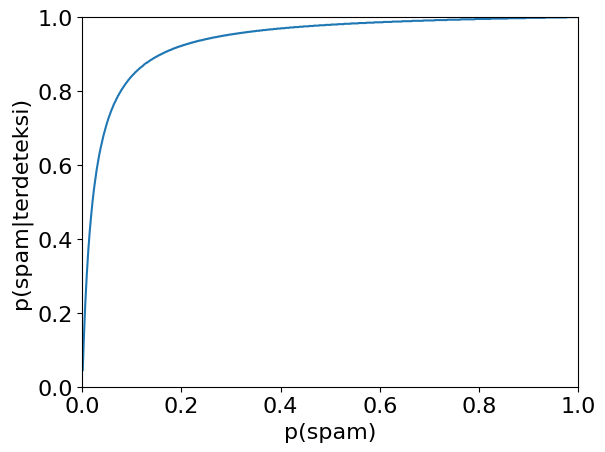

In [8]:
sensitivity = 0.95
specificity = 0.98
batas_bawah_prior = 0.001
batas_atas_prior = 1.001
step_tiap_prior = 0.001

plot_range_probabilitas_posterior(batas_bawah_prior,
                           batas_atas_prior,
                           step_tiap_prior,
                           sensitivity=sensitivity,
                           specificity=specificity,
                           by="prior")

Dari visualisasi diatas, dapat dikatakan bahwa meskipun nilai sensitivity dan specificity aplikasi sangat akurat, Namun jika proporsi dari email spam yang masuk sedikit dibanding keseluruhan email maka nilai posterior akan cenderung kecil.

Visualisasi interaktif, pengaruh prior terhadap posterior

In [9]:
sensitivity = 0.95
specificity = 0.98
batas_bawah_prior = 0.001
batas_atas_prior = 1.001
step_tiap_prior = 0.001
plot_interaktif_probabilitas_posterior(batas_bawah_prior,
                           batas_atas_prior,
                           step_tiap_prior,
                           sensitivity=sensitivity,
                           specificity=specificity,
                           by="prior")

Output()

---
### **2.3 Apakah jumlah data berpengaruh?**

Jika kita tinjau kasus sekarang, dimana:

    n_email = 5000
    P(spam) = 0.03
    sensitivity = 0.95
    specificity = 0.98

Dalam kasus ini kita gunakan fungsi **hitung_jumlah_kejadian** untuk menghitung jumlah kejadian berdasarkan nilai probabilitasnya.

Terdapat dua input yaitu:
- sample space, dan
- probabilitas kejadian (event)

Conton Penggunaan:

hitung_jumlah_kejadian(sample_space, probabilitas_event)

Maka didapatkan:
    

In [10]:
jumlah_total_email = 5000
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email non spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 150
Jumlah email non spam adalah 4850


Terlihat perbandingannya cukup jauh. Hal ini mengakibatkan:

In [11]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 142
Jumlah email spam yang tidak terdeteksi adalah: 8
Jumlah email non spam yang terdeteksi sebagai spam adalah: 97
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 4753


![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_06_Bayes.png)


> Note
> - email **spam** yang **terdeteksi spam** disebut **True Positive**
> - email **spam** yang **tidak terdeteksi spam** disebut **False Negative**
> - email **non-spam** yang **terdeteksi spam** disebut **False Positive**
> - email **non-spam** yang **tidak terdeteksi spam** disebut **True Negative**

Reff : https://p7x7q5i4.rocketcdn.me/en/wp-content/uploads/sites/2/2020/01/false-positive-smartpedia.jpg

In [12]:
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98
p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = 0.59


##### Bagaimana jika $P(\text{spam}) = 0.1$?

In [13]:
jumlah_total_email = 5000
P_spam = 0.1
sensitivity = 0.95
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 500
Jumlah email spam adalah 4500


In [14]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 475
Jumlah email spam yang tidak terdeteksi adalah: 25
Jumlah email non spam yang terdeteksi sebagai spam adalah: 90
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 4410


![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_07_Bayes.png)

In [15]:
P_spam = 0.1
sensitivity = 0.95
specificity = 0.98
p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = 0.84


Dari kasus ini bisa dilihat bahwa nilai prior atau proporsi email spam terhadap keseluruhan email mempengaruhi nilai posterior

##### Bagaimana jika n_data=10000 dan $P(\text{spam})=0.1$?

Pada kasus ini proporsi email spam tetap sama, namun jumlah keseluruhan email berubah

In [16]:
jumlah_total_email = 10000
P_spam = 0.1
sensitivity = 0.95
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 1000
Jumlah email spam adalah 9000


In [17]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 950
Jumlah email spam yang tidak terdeteksi adalah: 50
Jumlah email non spam yang terdeteksi sebagai spam adalah: 180
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 8820


![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_08_Bayes.png)

In [18]:
P_spam = 0.1
sensitivity = 0.95
specificity = 0.98
p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam (posterior) = 0.84


Dari sini terlihat bahwa jumlah data tidak berpengaruh terhadap probability posterior

---
### **2.4 Pengaruh Sensitivity terhadap Posterior**

Dalam kasus ini, Sensitivity adalah keakuratan aplikasi dalam mendeteksi positif email spam setelah diteketahui bahwa email tersebut benar-benar spam.
    
    Sensitivity = P(terdeteksi | spam)

Jika ditinjau dari persamaan maka sensitivity berbanding lurus terhadap nilai posterior sehingga:

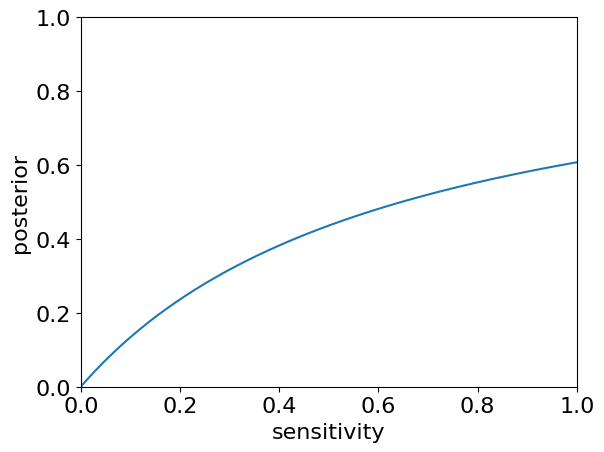

In [19]:
prior = 0.03
specificity = 0.98
batas_bawah_sensitivity = 0.001
batas_atas_sensitivity = 1.001
step_tiap_sensitivity = 0.001

plot_range_probabilitas_posterior(batas_bawah_sensitivity,
                           batas_atas_sensitivity,
                           step_tiap_sensitivity,
                           prior=prior,
                           specificity=specificity,
                           by="sensitivity")

Bagaimana sensitivity dapat mempengaruhi nilai posterior?

Kita Coba lihat pada kasus dimana sensitivity=0.95 dan sensitivity=0.7. Dalam kasus ini:

    prior = 0.03
    specificity = 0.98

####  2.4.1 Sensitivity = 0.95

![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_09_Bayes.png)

Dari penjelasan pada kasus prior=0.03 sebelumnya, saat nilai sensitivity=0.95, banyak email yang benar-benar spam yang berhasil dideteksi sebagai spam.

In [20]:
jumlah_total_email = 5000
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 150
Jumlah email spam adalah 4850


In [21]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 142
Jumlah email spam yang tidak terdeteksi adalah: 8
Jumlah email non spam yang terdeteksi sebagai spam adalah: 97
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 4753


In [22]:
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98

p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = 0.59


####  2.4.2 Sensitivity = 0.7

In [23]:
jumlah_total_email = 5000
P_spam = 0.03
sensitivity = 0.7
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 150
Jumlah email spam adalah 4850


In [24]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 105
Jumlah email spam yang tidak terdeteksi adalah: 45
Jumlah email non spam yang terdeteksi sebagai spam adalah: 97
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 4753


![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_10_Bayes.png)

- Terlihat bahwa sensitivity rendah menyebabkan banyak email yang benar-benar spam tidak dideteksi sebagai spam.
- Sehingga proporsi email spam di ruang sample terdeteksi berkurang.

In [25]:
P_spam = 0.03
sensitivity = 0.7
specificity = 0.98

p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = 0.52


Interactive plot Sensitivity vs Posterior

In [26]:
prior = 0.03
specificity = 0.98
batas_bawah_prior = 0.001
batas_atas_prior = 1.001
step_tiap_prior = 0.001
plot_interaktif_probabilitas_posterior(batas_bawah_prior,
                           batas_atas_prior,
                           step_tiap_prior,
                           prior=prior,
                           specificity=specificity,
                           by="sensitivity")

Output()

---
### **2.5 Pengaruh Evidence terhadap Posterior**

Dalam kasus ini, probabilitas dari evidence, $P(\text{terdeteksi})$, dipengaruhi oleh sensitivity dan specificity, dimana:

    P(terdeteksi) = sensitivity*prior + (1-specificity)*(1-prior)

Kita telah melihat pengaruh dari sensitivity terhadap posterior, sekarang kita akan melihat pengaruh specificity terhadap posterior

#### 2.5.1 Pengaruh specificity terhadap posterior

Dalam kasus sekarang, specificity adalah kemampuan aplikasi dalam mendeteksi email yang benar-benar non-spam sebagai email non-spam

Dalam hal ini jika specificity sebesar 0.98, maka dapat dikatakan bahwa 98% email non-spam dideteksi sebagai non-spam.

Dengan kata lain masih terdapat 2% email non-spam dideteksi sebagai spam

Kita lihat pengaruh dari specificity. Disini kita gunakan:
    
    prior = 0.03
    sensitivity=0.95

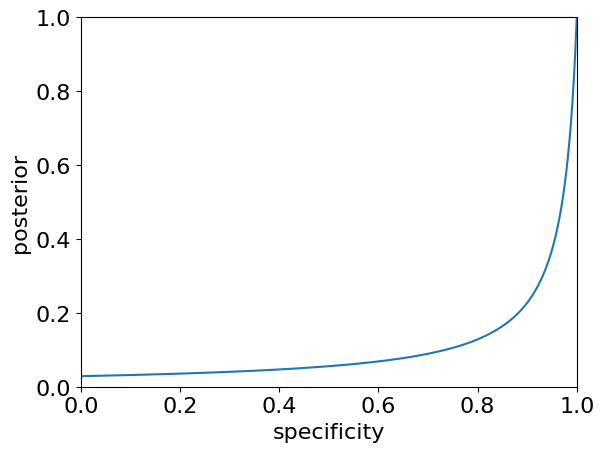

In [27]:
prior = 0.03
sensitivity = 0.95
batas_bawah_specificity = 0.001
batas_atas_specificity= 1.001
step_tiap_specificity = 0.001

plot_range_probabilitas_posterior(batas_bawah_specificity,
                           batas_atas_specificity,
                           step_tiap_specificity,
                           prior=prior,
                           sensitivity=sensitivity,
                           by="specificity")

Terlihat bahwa, Jika nilai specificity tinggi maka nilai posterior juga akan tinggi

Mengapa demikian?

Specificity akan mempengaruhi jumlah email non-spam yang dideteksi sebagai spam didalam ruang sample terdeteksi.

Kita akan lihat pada kasus dimana specificity=0.98 dan specificity=0.7. Dalam kasus ini:

    prior = 0.03
    sensitivity = 0.95

#### 2.5.1.1 Specificity = 0.98

![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_11_Bayes.png)

Dari penjelasan pada kasus prior=0.03 sebelumnya, saat nilai specificity=0.98, Hanya sedikit  email non-spam yang dideteksi sebagai spam.

In [28]:
jumlah_total_email = 5000
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 150
Jumlah email spam adalah 4850


In [29]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 142
Jumlah email spam yang tidak terdeteksi adalah: 8
Jumlah email non spam yang terdeteksi sebagai spam adalah: 97
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 4753


In [30]:
P_spam = 0.03
sensitivity = 0.95
specificity = 0.98

p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = 0.59


#### 2.5.1.1 Specificity = 0.7

In [31]:
jumlah_total_email = 5000
P_spam = 0.03
sensitivity = 0.95
specificity = 0.7

# sehingga:
jumlah_email_spam = hitung_jumlah_kejadian(jumlah_total_email, P_spam)
print(f"Jumlah email spam adalah {jumlah_email_spam}")

jumlah_email_non_spam = jumlah_total_email - jumlah_email_spam
print(f"Jumlah email spam adalah {jumlah_email_non_spam}")

Jumlah email spam adalah 150
Jumlah email spam adalah 4850


In [32]:
jumlah_spam_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, sensitivity)
print(f"Jumlah email spam yang terdeteksi adalah: {jumlah_spam_terdeteksi}")

jumlah_spam_tidak_terdeteksi = hitung_jumlah_kejadian(jumlah_email_spam, 1-sensitivity)
print(f"Jumlah email spam yang tidak terdeteksi adalah: {jumlah_spam_tidak_terdeteksi}")

jumlah_nonspam_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, 1-specificity)
print(f"Jumlah email non spam yang terdeteksi sebagai spam adalah: {jumlah_nonspam_terdeteksi_spam}")

jumlah_nonspam_tidak_terdeteksi_spam = hitung_jumlah_kejadian(jumlah_email_non_spam, specificity)
print(f"Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: {jumlah_nonspam_tidak_terdeteksi_spam}")

Jumlah email spam yang terdeteksi adalah: 142
Jumlah email spam yang tidak terdeteksi adalah: 8
Jumlah email non spam yang terdeteksi sebagai spam adalah: 1455
Jumlah email non spam yang tidak terdeteksi sebagai spam adalah: 3395


![](https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-probability/live_05_12_Bayes.png)

- Terlihat bahwa specificity yang rendah mengakibatkan meningkatnya jumlah email non-spam yang terdeteksi sebagai spam
- Hal ini mengakibatkan ruang sample terdeteksi semakin membesar, Namun lebih banyak diisi dengan email non-spam

Sehingga:

In [33]:
P_spam = 0.03
sensitivity = 0.95
specificity = 0.7

p_terdeteksi = hitung_total_probabilitas(sensitivity, P_spam,
                                           (1-specificity), (1-P_spam))

posterior = hitung_probabilitas_posterior(P_spam, sensitivity, p_terdeteksi)
print(f"Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = {posterior:.2f}" )

Pada kasus ini proporsi email spam terhadap seluruh email yang terdeteksi spam(posterior) = 0.09


In [34]:
prior = 0.03
sensitivity = 0.95
batas_bawah_prior = 0.001
batas_atas_prior = 1.001
step_tiap_prior = 0.001
plot_interaktif_probabilitas_posterior(batas_bawah_prior,
                           batas_atas_prior,
                           step_tiap_prior,
                           prior=prior,
                           sensitivity=sensitivity,
                           by="specificity")

Output()

----

---
### **Interactive Posterior Probability**

Pada visualisasi dibawah ini, anda dapat mencoba kombinasi prior, sensitivity, dan specificity dan melihat pengaruhnya terhadap nilai posterior.

In [35]:
prior = 0.03
sensitivity = 0.95
batas_bawah_prior = 0.001
batas_atas_prior = 1.001
step_tiap_prior = 0.001
plot_interaktif_probabilitas_posterior(batas_bawah_prior,
                           batas_atas_prior,
                           step_tiap_prior,
                           by="all")

Output()

---
## **Case Transaksi Toko**

Data berikut merupakan [data transaksi produk Pipa dan Semen](https://drive.google.com/file/d/1bioUp5WK2pc68OQtHeQXunHsHfIdeJyt/preview) di dua toko berbeda

In [37]:
summary_data('../data/transaksi_toko.csv')

Hasil Data Operasi      Pipa    Semen
--------------------  ------  -------
Mampang                  451     1299
Citayem                  483     1203


---
#### **1. Berapa peluang transaksi produk pipa?**

In [38]:
# Mencari ruang sample
n_sample = 451 + 483 + 1299 + 1203

print(f"Jumlah ruang sample: {n_sample}")

Jumlah ruang sample: 3436


In [39]:
# mencari jumlah kejadian transaksi produk pipa
n_A = 451 + 483

print(f"jumlah terjadi-nya transaksi produk Pipa: {n_A}")

jumlah terjadi-nya transaksi produk Pipa: 934


In [40]:
# Cari Peluang transaksi produk pipa dengan membagi n_A dengan n_sample
peluang_A = n_A / n_sample

print(f"peluang orang membeli produk pipa adalah : {peluang_A:.2f}")

peluang orang membeli produk pipa adalah : 0.27


> Dapat disimpulkan bahwa peluang dilakukan transaksi pipa sebesar 0.27

---
#### **2. Berapa peluang transaksi produk pipa jika diketahui transaksi dilakukan di cabang Citayem**

In [41]:
# mencari kejadian transaksi di cabang Citayem
n_B =  483+1203

print("")
print(f"jumlah terjadi-nya transaksi di cabang Citayem: {n_B}")


jumlah terjadi-nya transaksi di cabang Citayem: 1686


In [42]:
# Mencari jumlah transaksi produk pipa di Cabang Citayem
n_A_B =  483

print("")
print(f"jumlah terjadi-nya transaksi produk Pipa di cabang Citayem: {n_A_B}")


jumlah terjadi-nya transaksi produk Pipa di cabang Citayem: 483


In [43]:
# Cari Peluang envent A_dan_B dengan membagi n_A_B dengan n_B
peluang_A_diketahui_B = n_A_B / n_B

print(f"peluang orang membeli produk Pipa di toko Citayem adalah : {peluang_A_diketahui_B:.2f}")

peluang orang membeli produk Pipa di toko Citayem adalah : 0.29


> Disini bisa dikatakan jika seseorang pergi ke toko di cabang Citayem, kemungkinan kecil mereka malakukan transaksi produk Pipa.

> Hal ini dapat dilihat dari probabilitas transaksi produk pipa jika diketahui transaksi dilakukan di cabang Citayem: 0.29

---
#### **3. Jika barang yang beli adalah produk pipa, berapa peluang transaksi dilakukan di cabang Citayem?**

In [44]:
# Cari Peluang transaksi produk pipa dengan membagi n_B dengan n_sample
peluang_B = n_B / n_sample

print(f"peluang orang melakukan transaksi di Citayem adalah : {peluang_B:.2f}")

peluang orang melakukan transaksi di Citayem adalah : 0.49


In [45]:
P_B_diketahui_A = (peluang_B * peluang_A_diketahui_B) / peluang_A

print(f"peluang transaksi dilakukan di Cabang Citayem jika diketahui produk yang dibeli adalah Pipa: {P_B_diketahui_A:.2f}")

peluang transaksi dilakukan di Cabang Citayem jika diketahui produk yang dibeli adalah Pipa: 0.52


> Dari hasil perhitungan diatas dapat dikatakan jika diketahui produk yang ditransaksikan adalah pipa maka kemungkinan transaksi dilakukan di cabang Citayem sebesar 0.52